<a href="https://colab.research.google.com/github/agungtriu/Belajar-Machine-Learning-untuk-Pemula/blob/master/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-08 10:44:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.15MB/s    in 71s     

2020-07-08 10:45:18 (4.36 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/rockpaperscissors'

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [5]:
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
paper                1424
rock                 1452
rockpaperscissors       1
rps-cv-images           1
scissors             1500
dtype: int64

In [6]:
df = df.set_index("tag")
df = df.drop("rockpaperscissors", axis=0)
df = df.drop("rps-cv-images", axis=0)
df = df.reset_index()
df.groupby(['tag']).size()

tag
paper       1424
rock        1452
scissors    1500
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = df['path']
y = df['tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=300)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=100)

df_tr = pd.DataFrame({'path':X_train, 'tag':y_train, 'set':'train'})
df_te = pd.DataFrame({'path':X_test, 'tag':y_test, 'set':'test'})
df_val = pd.DataFrame({'path':X_val, 'tag':y_val, 'set':'validation'})

df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)
print(df_all.groupby(['set','tag']).size(),'\n')

df_all.sample(3)

set         tag     
test        paper        142
            rock         153
            scissors     143
train       paper       1139
            rock        1159
            scissors    1202
validation  paper        143
            rock         140
            scissors     155
dtype: int64 



,path,tag,set
3009,/tmp/rockpaperscissors/rps-cv-images/paper/QLX...,paper,train
2488,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
844,/tmp/rockpaperscissors/paper/hu3OxByp0O4KCJft.png,paper,train


In [8]:
import shutil
from tqdm.notebook import tqdm as tq

datasource_path = "/tmp/rockpaperscissors/"
dataset_path = "/tmp/dataset_rockpaperscissors/"

for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [9]:
base_dir = '/tmp/dataset_rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [10]:
os.listdir('/tmp/dataset_rockpaperscissors/train')

['rock', 'paper', 'scissors']

In [11]:
os.listdir('/tmp/dataset_rockpaperscissors/validation')

['rock', 'paper', 'scissors']

In [12]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [13]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 300),
        batch_size=4,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 300),
        batch_size=4,
        class_mode='categorical')

Found 2095 images belonging to 3 classes.
Found 413 images belonging to 3 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 33, 128)      

In [22]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)

Epoch 1/20
25/25 - 14s - loss: 1.1779 - accuracy: 0.3300 - val_loss: 1.0980 - val_accuracy: 0.3333
Epoch 2/20
25/25 - 14s - loss: 1.1021 - accuracy: 0.3600 - val_loss: 1.1135 - val_accuracy: 0.1667
Epoch 3/20
25/25 - 14s - loss: 1.1238 - accuracy: 0.3800 - val_loss: 1.2004 - val_accuracy: 0.2500
Epoch 4/20
25/25 - 14s - loss: 1.1205 - accuracy: 0.3300 - val_loss: 1.0863 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 14s - loss: 1.1191 - accuracy: 0.4100 - val_loss: 1.0619 - val_accuracy: 0.4167
Epoch 6/20
25/25 - 14s - loss: 1.0904 - accuracy: 0.4400 - val_loss: 1.0401 - val_accuracy: 0.4167
Epoch 7/20
25/25 - 14s - loss: 1.0926 - accuracy: 0.4900 - val_loss: 0.8297 - val_accuracy: 0.8333
Epoch 8/20
25/25 - 14s - loss: 0.9546 - accuracy: 0.5800 - val_loss: 0.9321 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 14s - loss: 0.7449 - accuracy: 0.7600 - val_loss: 0.9186 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 14s - loss: 0.5858 - accuracy: 0.7576 - val_loss: 0.2812 - val_accuracy: 1.0000
Epoch 11/

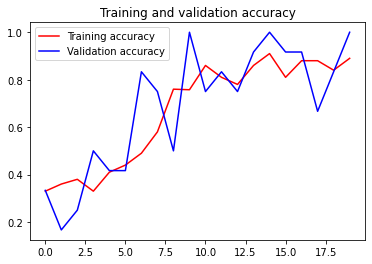

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving IMG_20200708_180628.jpg to IMG_20200708_180628.jpg
IMG_20200708_180628.jpg
rock


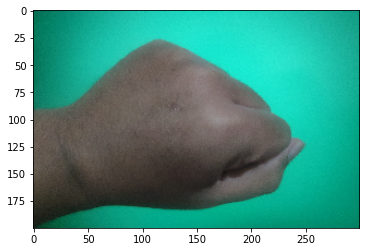

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  result=np.argmax(classes)
  
  print(fn)
  if result==0:
    print('paper')
  elif result==1:
    print('rock')
  elif result==2:
    print('scissors')